To install compatible versions of pmdarima, numpy, and pandas on Python 3.9, you can use the following on **WINDOWS11**:

In [16]:
# pip install numpy==1.21.4 
# pandas==1.3.3 pmdarima==2.0.4
# pip install matplotlib==3.4.3
 
# pip install seaborn==0.13.2
# pip install altair==4.2.0
# pip install plotly==5.24.1

To install compatible versions of pmdarima, numpy, and pandas on Python 3.9, you can use the following on **macOS 14.4.1 (23E224) Apple M2**:

In [17]:
#%pip install pandas==2.2.3
#%pip install numpy==1.26.4
#%pip install pmdarima==2.0.4
# %pip install xgboost==2.1.1
#%pip install scikit-learn==1.5.2
#%pip install scipy==1.10.1
#%pip install seaborn==0.13.2
#%pip install statsmodels==0.14.4
#%pip install prophet==1.1.6
#%pip install nbformat==5.10.4
#%pip install matplotlib==3.9.0
#%pip install plotly==5.24.1
#%pip install altair==4.1.0
#%pip install rich==13.1.0
#%pip install requests==2.26.0
#%pip install py7zr
#%pip install kaggle


In [18]:
import pandas as pd
import numpy as np
import pmdarima as pm
from pmdarima import ARIMA, auto_arima

`pmdarima` is a statistical library designed to fill the void in Python's time series 
analysis capabilities by providing easy-to-use interfaces built on top of 
statsmodels and scikit-learn.

In [19]:
import itertools
from rich import inspect
#statistics libraries
import statsmodels.api as sm
import scipy
from scipy.stats import anderson
from statsmodels.tools.eval_measures import rmse
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import month_plot, seasonal_plot, plot_acf, plot_pacf, quarter_plot
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing, SimpleExpSmoothing
from statsmodels.stats.diagnostic import acorr_ljungbox as ljung
from statsmodels.tsa.statespace.tools import diff as diff
from scipy import signal
from scipy.stats import shapiro
from scipy.stats import boxcox
#  %pip3 install -U scikit-learn
from sklearn.preprocessing import StandardScaler

In [20]:
import warnings
warnings.filterwarnings("ignore")
np.random.seed(786)

In [21]:
#Plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt # Altair is a declarative statistical visualization library for Python, based on Vega and Vega-Lite.
import plotly as px

In [22]:
#%pip install py7zr
import requests
import py7zr
import zipfile
import os # os mean operating system / for file operations os.path, os.listdir, os.rename, os.remove etc 
import json # for json operations json.loads, json.dumps etc

In [23]:
#brew install xgboost
#%pip install xgboost==2.1.3
import xgboost as xgb

# Dataset for Retail Demand Forecasting used in the course

Through this unit, we will use data “Corporación Favorita Grocery Sales Forecasting” from Kaggle. The objective is to predict future sales of items in Favorita grocery stores across different regions of Ecuador. Reliable predictions help optimize inventory management, prevent stockouts, and improve promotion strategies.

## Input data

```train.csv```
- Time-series data, which includes the target unit_sales by date, store_nbr, and item_nbr and a unique id to label rows.
- The target unit_sales can be integer (e.g., a bag of chips) or float (e.g., 1.5 kg of cheese).
- Negative values of unit_sales represent returns of that particular item.
- The onpromotion column tells whether that item_nbr was on promotion for a specified date and store_nbr.
- Approximately 16% of the onpromotion values in this file are NaN.
- NOTE: The training data does not include rows for items that had zero unit_sales for a store/date combination. There is no information as to whether or not the item was in stock for the store on the date, and teams will need to decide the best way to handle that situation. Also, there are a small number of items seen in the training data that aren't seen in the test data.

```stores.csv```
- Store metadata, including city, state, type, and cluster.
- cluster is a grouping of similar stores.

```items.csv```
- Item metadata, including family, class, and perishable.
- NOTE: Items marked as perishable have a score weight of 1.25; otherwise, the weight is 1.0.

```transactions.csv```
- The count of sales transactions for each date, store_nbr combination. Only included for the training data timeframe.

```oil.csv```

- Daily oil price. Includes values during both the train and test data timeframe. (Ecuador is an oil-dependent country and it's economical health is highly vulnerable to shocks in oil prices.)

```holidays_events.csv```
- Holidays and Events, with metadata
- NOTE: Pay special attention to the transferred column. A holiday that is transferred officially falls on that calendar day, but was moved to another date by the government. A transferred day is more like a normal day than a holiday. To find the day that it was actually celebrated, look for the corresponding row where type is Transfer. For example, the holiday Independencia de Guayaquil was transferred from 2012-10-09 to 2012-10-12, which means it was celebrated on 2012-10-12. Days that are type Bridge are extra days that are added to a holiday (e.g., to extend the break across a long weekend). These are frequently made up by the type Work Day which is a day not normally scheduled for work (e.g., Saturday) that is meant to payback the Bridge.
- Additional holidays are days added a regular calendar holiday, for example, as typically happens around Christmas (making Christmas Eve a holiday).

!pip install kaggle # install kaggle package to download datasets from kaggle

!mkdir -p ~/.kaggle # create directory to store kaggle.json file in the right directory 

!cp /path/to/your/kaggle.json ~/.kaggle/kaggle.json # copy kaggle.json to the right directory

!chmod 600 ~/.kaggle/kaggle.json # change permissions of the file to read/write only for the owner of the file   



In [32]:
'''
# Create the .kaggle directory if it doesn't exist
os.makedirs(os.path.expanduser('~/.kaggle'), exist_ok=True)

# Write the kaggle.json file to the .kaggle directory
with open(os.path.expanduser('~/.kaggle/kaggle.json'), 'w') as f:
    json.dump({
        "username": "zarkovukovic",
        "key": "49dd02b25f856a2a6f3fd40f251a8391"
    }, f)

# Set the permissions of the kaggle.json file
os.chmod(os.path.expanduser('~/.kaggle/kaggle.json'), 0o600)
'''

'\n# Create the .kaggle directory if it doesn\'t exist\nos.makedirs(os.path.expanduser(\'~/.kaggle\'), exist_ok=True)\n\n# Write the kaggle.json file to the .kaggle directory\nwith open(os.path.expanduser(\'~/.kaggle/kaggle.json\'), \'w\') as f:\n    json.dump({\n        "username": "zarkovukovic",\n        "key": "49dd02b25f856a2a6f3fd40f251a8391"\n    }, f)\n\n# Set the permissions of the kaggle.json file\nos.chmod(os.path.expanduser(\'~/.kaggle/kaggle.json\'), 0o600)\n'

In [26]:
# List the available datasets in the competition
#!kaggle competitions files -c favorita-grocery-sales-forecasting

# Download the dataset
#!kaggle competitions download -c favorita-grocery-sales-forecasting

## EDA for Time-series data
In this lesson, we will walk through an Exploratory Data Analysis (EDA) for the Corporación Favorita Grocery Sales Forecasting dataset from Kaggle. EDA is a crucial step before applying machine learning models, especially in time-series forecasting. We will focus on understanding the structure of the dataset, handling missing data, visualizing sales trends, and investigating relationships among the various features.



### Step 1: Connect to Google Drive

In [ ]:
'''
test_url = 'https://drive.google.com/file/d/1VEWk3yZm5eDQetrff-wmiRJMbVMXrzeT/view?usp=sharing'
train_url = 'https://drive.google.com/file/d/1YqfDuOFuKyECVfp3imU1t7Mo7c_FOFUZ/view?usp=sharing'
transactions_url = 'https://drive.google.com/file/d/1oZKrUDpeVammaW09US5XNm_IG53tiTJh/view?usp=sharing'
items_url = 'https://drive.google.com/file/d/1NcT9c3ne8AyfnAuHal_GxW5btRmylduD/view?usp=sharing'
stores_url = 'https://drive.google.com/file/d/1BqscT4LqpegNf35xBrSMq2K_e8W6e0EO/view?usp=sharing'
oil_url = 'https://drive.google.com/file/d/14OsxC-p8dIQQkefBI9A19cmNVq07-PJr/view?usp=sharing'
holidays_events_url = 'https://drive.google.com/file/d/1eLHgOYq9C-twiBtoeSyYCDtF941ltT2A/view?usp=sharing'

# Define the destination file names for each file in a loop
destination_files = ['test', 'train', 'transactions', 'items', 'stores', 'oil', 'holidays_events']

# Define the URLs for each file in a loop
urls = [test_url, train_url, transactions_url, items_url, stores_url, oil_url, holidays_events_url]

# Download each file from Google Drive
for destination, url in zip(destination_files, urls):
    gdown.download(f'https://drive.google.com/uc?id={url.split("/")[-2]}', f'{destination}.csv', quiet=False)


# Load the data into a DataFrame in a loop
for destination in destination_files:
    globals()[destination] = pd.read_csv(f'{destination}.csv')

# Display the shape of each DataFrame in a loop
for destination in destination_files:
    print(f'{destination}.shape: {globals()[destination].shape}')
'''

### Step 2: Loading the Data
We will start by loading the following datasets:
- `train.csv`: This contains time-series data for each item sold in a store.
- `stores.csv`: Contains store metadata.
- `items.csv`: Contains item metadata.
- `transactions.csv`: Contains the number of transactions for each store per day.
- `oil.csv`: Contains daily oil prices.
- `holidays_events.csv`: Contains holiday and event data.


In [34]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
df_transactions = pd.read_csv('transactions.csv')
df_items = pd.read_csv('items.csv')
df_stores = pd.read_csv('stores.csv')
df_oil = pd.read_csv('oil.csv')
df_holidays_events = pd.read_csv('holidays_events.csv')

In [35]:
df_train.head()

,id,date,store_nbr,item_nbr,unit_sales,onpromotion
0,0,2013-01-01,25,103665,7.0,NaN
1,1,2013-01-01,25,105574,1.0,NaN
2,2,2013-01-01,25,105575,2.0,NaN
3,3,2013-01-01,25,108079,1.0,NaN
4,4,2013-01-01,25,108701,1.0,NaN


### Step 3: Checking for Missing Data
Handling missing data is important for accurate analysis and modeling.

In [36]:
# Checking missing values
df_train.isnull().sum()

id                    0
date                  0
store_nbr             0
item_nbr              0
unit_sales            0
onpromotion    21657651
dtype: int64

In [ ]:
'''
id                    0
date                  0
store_nbr             0
item_nbr              0
unit_sales            0
onpromotion    21657651
'''

In [37]:
# Focusing on missing values in the 'onpromotion' column
df_train['onpromotion'] = df_train['onpromotion'].fillna(False).astype(bool)
df_train.isnull().sum()

id             0
date           0
store_nbr      0
item_nbr       0
unit_sales     0
onpromotion    0
dtype: int64

#### Challenge 1: Checking for Missing Data
Other files might contain the missing data too. Check each of them and and think what would be a best way to deal with such data (cleaning, filling up with default values or something else)?

#### `dcoilwtico` (daily price) had 43 missing values
By applying ffill() to the 'dcoilwtico' column, any missing values in this column 
will be replaced with the most recent non-missing value that precedes them. 
This is useful in time series data where we want to maintain continuity by 
carrying forward the last known value. 

In [38]:
# I will use the forward fill method to fill the missing value in the 'dcoilwtico' column
df_oil['dcoilwtico'] = df_oil['dcoilwtico'].ffill()
df_oil.isnull().sum()


date          0
dcoilwtico    1
dtype: int64

In [39]:
# bfill() backward fill method to fill the one remaining missing value
df_oil['dcoilwtico'] = df_oil['dcoilwtico'].bfill() 
df_oil.isnull().sum()

date          0
dcoilwtico    0
dtype: int64

In [41]:
df_oil.head()

,date,dcoilwtico
0,2013-01-01,93.14
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20


### Step 4: Handling Outliers
Let's check for outliers in unit_sales, especially negative values, which indicate product returns.

In [42]:
# Checking for negative sales (returns)
negative_sales = df_train[df_train['unit_sales'] < 0]

# Replacing negative sales with 0 to reflect returns as non-sales
df_train['unit_sales'] = df_train['unit_sales'].apply(lambda x: max(x, 0))

negative_sales.head()  # Viewing negative sales for analysis

,id,date,store_nbr,item_nbr,unit_sales,onpromotion
10655,10655,2013-01-02,10,456875,-3.0,False
46867,46867,2013-01-03,5,559044,-1.0,False
50970,50970,2013-01-03,9,365138,-3.0,False
71807,71807,2013-01-03,41,812716,-19.0,False
71992,71992,2013-01-03,41,1004551,-27.0,False


Another type of outlier could be extremely high sales for certain items or stores on specific days. These may be anomalies due to special events, promotions, or data errors. We can identify outliers by looking at sales values that are far higher than the typical sales distribution for a store or item. Often this can be measured with Z-score.

A Z-score (or standard score) is a statistical measurement that describes how many standard deviations a data point is from the mean of the dataset. It is a way to standardize data and make it comparable by converting different values to a common scale. Z-scores are often used to detect outliers and understand the relative position of a data point within a distribution.

### Step 4: Fill missing dates with zero sales
In time-series forecasting, especially in sales data, the time intervals (dates) are a crucial component. Every time step (e.g., daily sales) needs to be accounted for, even if there were no sales on some days. In the most datasets, which you will come across, only days with sales will contain some data. Therefore it is your job to fill out missing days. 

Steps:
- Convert the `date` column to datetime to handle time-series data.
- Set up a complete time range from the start date to the end date for each store-product combination.
- Group by store and item, and resample each group by day, filling in missing dates with 0.
- Recombine the data into a single DataFram

### Step 5: Feature Engineering
We can add some helpful features to the dataset:
- Year, Month, Day, and Day of Week extracted from the date column.
- We can also engineer rolling averages of unit_sales to smooth the time-series data.

In [43]:
# Convert date column to datetime
df_train['date'] = pd.to_datetime(df_train['date'])

In [44]:
# Creating new time-based features
df_train['year'] = df_train['date'].dt.year
df_train['month'] = df_train['date'].dt.month
df_train['day'] = df_train['date'].dt.day
df_train['day_of_week'] = df_train['date'].dt.dayofweek



In [45]:
# Calculating rolling average of unit_sales
df_train['unit_sales_7d_avg'] = df_train.groupby(['item_nbr', 'store_nbr'])['unit_sales'].transform(lambda x: x.rolling(window=7).mean())
df_train.head()

,id,date,store_nbr,item_nbr,unit_sales,onpromotion,year,month,day,day_of_week,unit_sales_7d_avg
0,0,2013-01-01,25,103665,7.0,False,2013,1,1,1,NaN
1,1,2013-01-01,25,105574,1.0,False,2013,1,1,1,NaN
2,2,2013-01-01,25,105575,2.0,False,2013,1,1,1,NaN
3,3,2013-01-01,25,108079,1.0,False,2013,1,1,1,NaN
4,4,2013-01-01,25,108701,1.0,False,2013,1,1,1,NaN


### Step 6: Visualizing Time-Series Data
We can now visualize the sales trends across time. Visualizations help to spot seasonality, trends, and irregular patterns.

a) Sales Over Time (Aggregated)
- We’ll first look at overall sales trends over time for all stores and items.

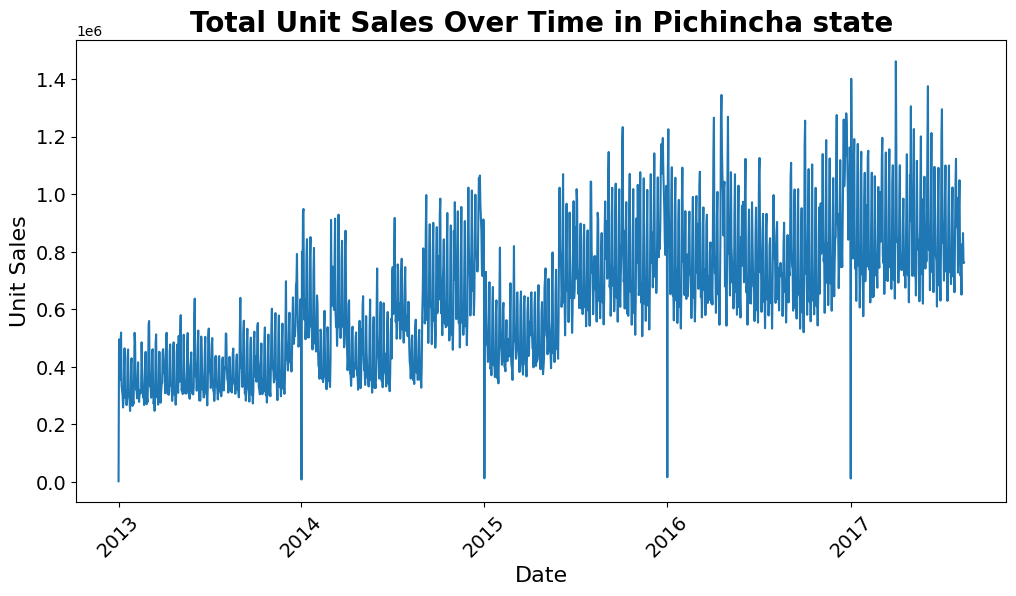

In [46]:
# Aggregating total sales by date
sales_by_date = df_train.groupby('date')['unit_sales'].sum()

# Plotting the time-series
plt.figure(figsize=(12,6))
plt.plot(sales_by_date.index, sales_by_date.values)
plt.title('Total Unit Sales Over Time in Pichincha state', fontsize=20, fontweight='bold')
plt.xlabel('Date', fontsize=16)
plt.ylabel('Unit Sales', fontsize=16)
plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)
plt.show()

b) Sales Trend by Year and Month
- We can decompose the trend by month and year to spot seasonality.

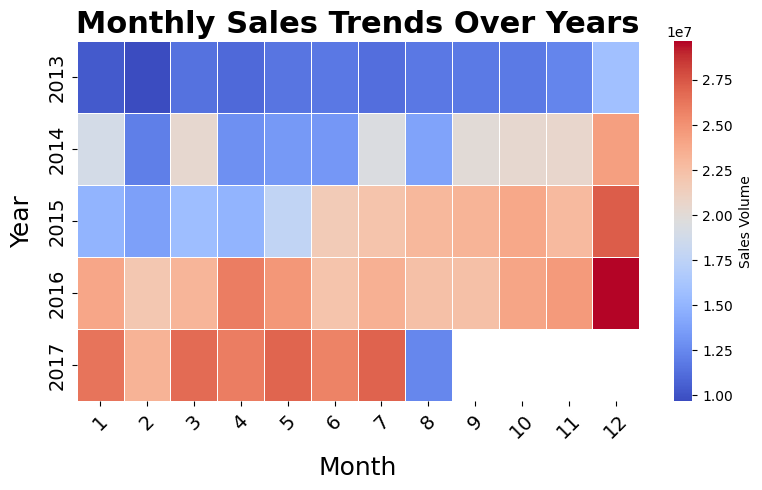

In [47]:
# Aggregating sales by year and month
sales_by_month = df_train.groupby(['year', 'month'])['unit_sales'].sum().unstack()

# Plotting heatmap of sales by year and month
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))  # Increase figure size for better visibility
sns.heatmap(
    sales_by_month, 
    cmap='coolwarm',  # Use a diverging colormap for better contrast
    linewidths=0.5,  # Add lines between cells for clarity
    linecolor='white',  # Use white lines for a cleaner look
    cbar_kws={'label': 'Sales Volume'}  # Add a descriptive colorbar label
)

# Customizing title and axes labels
plt.title('Monthly Sales Trends Over Years', fontsize=22, fontweight='bold')
plt.xlabel('Month', fontsize=18, labelpad=10)  # Labelpad adds spacing
plt.ylabel('Year', fontsize=18, labelpad=10)

# Formatting tick labels
plt.xticks(fontsize=14, rotation=45)  # Rotate x-axis labels for better readability
plt.yticks(fontsize=14)

# Adjust layout for better spacing
plt.tight_layout()

# Display the heatmap
plt.show()

### Step 7: Examining the Impact of Holidays
Let’s analyze how holidays and events affect sales patterns.

The Kernel crashed while executing code in the current cell or a previous cell. 
Please review the code in the cell(s) to identify a possible cause of the failure. 

### Step 8: Analyzing Perishable Items
Perishable items are products that have a limited shelf life and must be sold within a short time to avoid spoilage or waste. These include fresh produce, dairy products, meats, and bakery goods, among others. In grocery stores like Corporación Favorita (from the Kaggle dataset you’re working with), perishable items are often critical because they require more careful inventory management and sales forecasting.

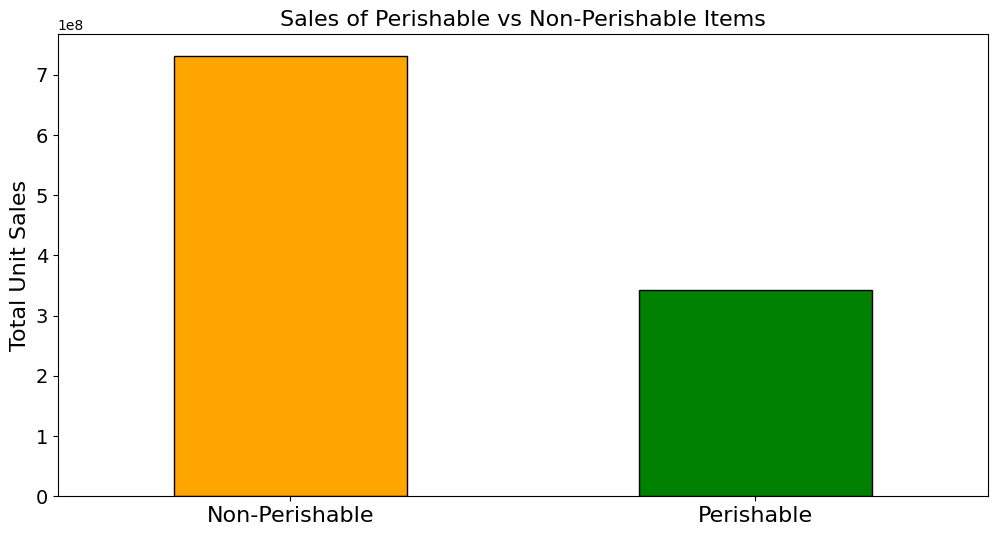

In [48]:
# Merging df_train with items to get perishable data
df_train_items = pd.merge(df_train, df_items, on='item_nbr', how='left')
df_train_items['perishable'] = df_train_items['perishable'].astype(bool)
# Aggregating sales by perishable and non-perishable items
perishable_sales = df_train_items.groupby('perishable')['unit_sales'].sum()

# Plotting sales for perishable and non-perishable items
plt.figure(figsize=(12,6))
perishable_sales.plot(kind='bar', color=['orange', 'green'], edgecolor='black')
plt.title('Sales of Perishable vs Non-Perishable Items', fontsize=16)
plt.ylabel('Total Unit Sales', fontsize=16)
plt.xlabel('')
plt.xticks(
    ticks=[0, 1], 
    labels=['Non-Perishable', 'Perishable'], 
    fontsize=16, 
    rotation=0  # Keep x-axis labels horizontal
)
plt.yticks(fontsize=14)
plt.show()

In [36]:
#Select list of stores located in the 'Pichincha' region
# data['stores.csv'][data['stores.csv']['state'] == 'Pichincha']